### Fine Tuning, 미세 조정
- ImageNet으로 학습된 Pretrained Model을 다른 목적 또는 다른 용도로 활용할 때 Feature Extractor의 가중치(Weight)를 제어하기 위한 기법이다.
- 특정 Layer들을 Unfreeze(trainable=False) 시켜서 학습에서 제외시키고 Learning Rate를 점차 감소시켜 적용한다.
- ImageNet과 유사한 데이터 세트이거나 개별 클래스 별로 데이터 건수가 작을 경우 사용을 권장한다.
- Fine Tuning이 언제나 모델의 좋은 성능을 가져오는 것은 아니기 때문에 적절히 사용할 수 있어야 한다.
- 먼저 Classification layers에만 학습을 시킨 뒤 전체에 학습을 시키는 순서로 진행하게 되며, 이를 위해 fit()을 최소 2번 사용한다.

##### 동물 분류

https://drive.google.com/file/d/1_d8RcCM21XneorFe_m4939erMkCnccS1/view?usp=drive_link

In [21]:
import numpy as np

file = open('./datasets/animals/translate.py', 'r')
content = file.readline()
content = content[content.index('{'): content.index('}') + 1]
content1 = eval(content)
content2 = {v : k for k, v in content1.items()}

file.close()

print(content1, content2, sep='\n')

{'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'scoiattolo': 'squirrel', 'dog': 'cane', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'spider': 'ragno', 'squirrel': 'scoiattolo'}
{'dog': 'cane', 'horse': 'cavallo', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'sheep': 'pecora', 'squirrel': 'scoiattolo', 'cane': 'dog', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'ragno': 'spider', 'scoiattolo': 'squirrel'}


In [2]:
import os
from glob import glob

root = './datasets/animals/original/'
directories = glob(os.path.join(root, '*'))
print(directories)

for directory in directories:
    try:
        os.rename(directory, os.path.join(root, content1[directory[directory.rindex('\\') + 1:]]))
    except KeyError as e:
        os.rename(directory, os.path.join(root, content2[directory[directory.rindex('\\') + 1:]]))

['./datasets/animals/original\\cane', './datasets/animals/original\\cavallo', './datasets/animals/original\\elefante', './datasets/animals/original\\farfalla', './datasets/animals/original\\gallina', './datasets/animals/original\\gatto', './datasets/animals/original\\mucca', './datasets/animals/original\\pecora', './datasets/animals/original\\ragno', './datasets/animals/original\\scoiattolo']


In [3]:
directories = glob(os.path.join(root, '*'))
print(directories)

['./datasets/animals/original\\butterfly', './datasets/animals/original\\cat', './datasets/animals/original\\chicken', './datasets/animals/original\\cow', './datasets/animals/original\\dog', './datasets/animals/original\\elephant', './datasets/animals/original\\horse', './datasets/animals/original\\sheep', './datasets/animals/original\\spider', './datasets/animals/original\\squirrel']


In [4]:
# 디렉토리 이름을 모두 가져오기(list 타입으로 변환)
directory_names = list(map(lambda directory: directory[directory.rindex("\\") + 1:], directories))
directory_names

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [5]:
# 전체 파일명을 디렉토리명과 일치하게 바꾸자!(예: dog1.png, dog2.png, ...)
# os.rename(old, new)
# 1. directory_names
# 2. os.listdir()
# os.listdir(os.path.join(root, 'dog'))

root = './datasets/animals/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')
        
        os.rename(old_file, new_file)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 150
BATCH_SIZE = 64

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(
    root,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

print(generator.class_indices)

Found 26179 images belonging to 10 classes.
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [7]:
generator.classes

array([0, 0, 0, ..., 9, 9, 9])

In [8]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'butterfly',
 1: 'cat',
 2: 'chicken',
 3: 'cow',
 4: 'dog',
 5: 'elephant',
 6: 'horse',
 7: 'sheep',
 8: 'spider',
 9: 'squirrel'}

In [9]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

target_names

['butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butt

In [10]:
import pandas as pd

animal_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
animal_df.file_paths = animal_df.file_paths.apply(lambda x : x.replace('\\', '/'))
animal_df

,file_paths,target_names,targets
0,./datasets/animals/original/butterfly/butterfl...,butterfly,0
1,./datasets/animals/original/butterfly/butterfl...,butterfly,0
2,./datasets/animals/original/butterfly/butterfl...,butterfly,0
3,./datasets/animals/original/butterfly/butterfl...,butterfly,0
4,./datasets/animals/original/butterfly/butterfl...,butterfly,0
...,...,...,...
26174,./datasets/animals/original/squirrel/squirrel9...,squirrel,9
26175,./datasets/animals/original/squirrel/squirrel9...,squirrel,9
26176,./datasets/animals/original/squirrel/squirrel9...,squirrel,9
26177,./datasets/animals/original/squirrel/squirrel9...,squirrel,9


In [11]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = train_test_split(animal_df.file_paths, animal_df.targets, stratify=animal_df.targets, test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
4    3890
8    3857
2    2478
6    2098
0    1690
3    1493
9    1490
7    1456
1    1334
5    1157
Name: count, dtype: int64
targets
4    973
8    964
2    620
6    525
0    422
3    373
9    372
7    364
1    334
5    289
Name: count, dtype: int64


In [12]:
train_train_images, validation_images, train_train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

print(train_train_targets.value_counts(), train_train_images.shape[0])
print(validation_targets.value_counts(), validation_images.shape[0])
print(test_targets.value_counts(), test_targets.shape[0])

targets
4    3112
8    3086
2    1982
6    1678
0    1352
3    1194
9    1192
7    1165
1    1067
5     926
Name: count, dtype: int64 16754
targets
4    778
8    771
2    496
6    420
0    338
3    299
9    298
7    291
1    267
5    231
Name: count, dtype: int64 4189
targets
4    973
8    964
2    620
6    525
0    422
3    373
9    372
7    364
1    334
5    289
Name: count, dtype: int64 5236


In [13]:
import shutil
import os.path

root = './datasets/animals/'

for filepath in train_images:
#     './datasets/animals/original/butterfly/butterfly1.png'
    animal_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/') + 1]
    destination = os.path.join(root, 'train/' + animal_dir)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    shutil.copy2(filepath, destination)

In [14]:
# valid copy
import shutil
import os.path

root = './datasets/animals/'

for filepath in validation_images:
#     './datasets/animals/original/butterfly/butterfly1.png'
    animal_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/') + 1]
    destination = os.path.join(root, 'validation/' + animal_dir)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    shutil.copy2(filepath, destination)

In [15]:
# test copy
# valid copy
import shutil
import os.path

root = './datasets/animals/'

for filepath in test_images:
#     './datasets/animals/original/butterfly/butterfly1.png'
    animal_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/') + 1]
    destination = os.path.join(root, 'test/' + animal_dir)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    shutil.copy2(filepath, destination)

In [16]:
train_df = animal_df.loc[train_train_images.index].reset_index(drop=True)
validation_df = animal_df.loc[validation_images.index].reset_index(drop=True)
test_df = animal_df.loc[test_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

16754
4189
5236


In [17]:
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

# 배치 크기와 이미지 크기를 전역 변수로 선언 
BATCH_SIZE = 64
IMAGE_SIZE = 224


class Dataset(Sequence):
#     입력 값(file_paths, targets)은 반드시 numpy array로 전달해야 한다.
#     file_paths: 이미지 파일의 절대 경로 list
#     targets: 이미지의 타겟 데이터 list
#     batch_size: __getitem__(self, index)를 호출할 때마다 가져올 데이터 batch 건수
#     aug: 이미지 증강 객체(albumentations)
#     shuffle: epoch마다 데이터를 섞을지 여부(학습 데이터만 적용)
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, shuffle=False, preprocess=None):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.shuffle = shuffle
        self.preprocess = preprocess
        
#         학습 데이터일 때
        if self.shuffle:
#             객체 생성 시 데이터를 섞고 시작 
            self.on_epoch_end()
            
#     Sequence를 상속받은 Dataset은 batch_size 단위로 입력 데이터를 처리한다.
#     __len__()은 전체 데이터 건수에서 batch_size 단위로 몇 번 데이터를 처리하는지 리턴한다.
    def __len__(self):
#         나누어 떨어지지 않으면 나머지 데이터를 위해 1번 더 가져오고 이를 위해 소수점은 모두 올려준다(np.ceil()).
        return int(np.ceil(len(self.targets)/self.batch_size))

#     batch_size 단위로 이미지 배열 list와 타겟 데이터 list를 가져온 뒤 변환한 값을 리턴한다.    
#     몇 번째 batch인지를 index로 전달받고 해당 index의 batch_size만큼 데이터들을 변환한다.
    def __getitem__(self, index):
        # 해당 인덱스의 batch_size만큼 슬라이스 인덱싱으로 file_path와 targets를 가져온다.
        file_paths_batch = self.file_paths[index*self.batch_size:(index+1)*self.batch_size]
        targets_batch = self.targets[index*self.batch_size:(index+1)*self.batch_size]
        
        # albumentations은 한 번에 이미지 한 개만 변환할 수 있기 때문에 batch_size만큼 반복하여 수행한다.
        files_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
        # opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음.
        for index in range(file_paths_batch.shape[0]):
#             opencv로 해당 경로의 이미지 불러오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[index]), cv2.COLOR_BGR2RGB)
#             원본 이미지를 모델에 맞게 Resize 진행
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
            if self.aug is not None:
                image = self.aug(image=image)['image']
            
            if self.preprocess is not None:
                image = self.preprocess(image)
                
            files_batch[index] = image
       
        return files_batch, targets_batch
            
            
    # 반복(epoch)이 끝나면 모델의 fit()에서 호출된다. 
    def on_epoch_end(self):
        if(self.shuffle):
            # 이미지 데이터와 맞는 타겟 데이터를 한 쌍으로 섞어준다.
            self.file_paths, self.targets = sklearn.utils.shuffle(self.file_paths, self.targets)
        else:
            pass

In [19]:
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values

In [23]:
import albumentations as A

aug = A.Compose([
    A.HorizontalFlip(p=0.3),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5)
])

dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, shuffle=True)

files_batch, targets_batch = next(iter(dataset))
print(files_batch.shape, targets_batch.shape)

(64, 224, 224, 3) (64, 10)


                      file_paths
target_names targets            
butterfly    0               422
cat          1               334
chicken      2               620
cow          3               373
dog          4               973
elephant     5               289
horse        6               525
sheep        7               364
spider       8               964
squirrel     9               372


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


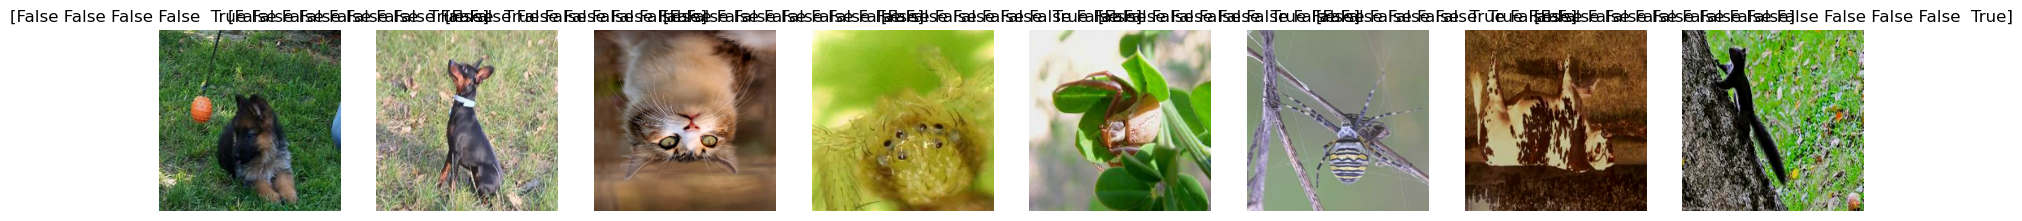

In [24]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

print(test_df.groupby(by=['target_names', 'targets']).count())
show_images(files_batch, ncols=8, title=targets_batch)

In [27]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

train_dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, 
                      shuffle=True, preprocess=xception_preprocess_input)
validation_dataset = Dataset(validation_file_paths, validation_targets, batch_size=BATCH_SIZE, aug=None, 
                       shuffle=False, preprocess=xception_preprocess_input)

test_dataset = Dataset(test_file_paths, test_targets, batch_size=BATCH_SIZE, aug=None, 
                       shuffle=False, preprocess=xception_preprocess_input)

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
        
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [30]:
model.layers

In [32]:
for layer in model.layers[:-4]:
    layer.trainable = False
    print(layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-4:]:
    print(layer.name, 'trainable:', layer.trainable)

input_1 trainable: False
conv1_pad trainable: False
conv1_conv trainable: False
pool1_pad trainable: False
pool1_pool trainable: False
conv2_block1_preact_bn trainable: False
conv2_block1_preact_relu trainable: False
conv2_block1_1_conv trainable: False
conv2_block1_1_bn trainable: False
conv2_block1_1_relu trainable: False
conv2_block1_2_pad trainable: False
conv2_block1_2_conv trainable: False
conv2_block1_2_bn trainable: False
conv2_block1_2_relu trainable: False
conv2_block1_0_conv trainable: False
conv2_block1_3_conv trainable: False
conv2_block1_out trainable: False
conv2_block2_preact_bn trainable: False
conv2_block2_preact_relu trainable: False
conv2_block2_1_conv trainable: False
conv2_block2_1_bn trainable: False
conv2_block2_1_relu trainable: False
conv2_block2_2_pad trainable: False
conv2_block2_2_conv trainable: False
conv2_block2_2_bn trainable: False
conv2_block2_2_relu trainable: False
conv2_block2_3_conv trainable: False
conv2_block2_out trainable: False
conv2_block3_p

In [33]:
from tensorflow.keras import layers

def fine_tune(datas, model_name, augmentor, preprocess):
    # 학습/검증/테스트용 이미지 파일 절대경로와 Label encoding 된 데이터 세트 반환
    train_file_paths, train_targets, validation_file_paths, validation_targets, test_file_paths, test_targets = datas
    
    # 학습과 검증용 Sequence Dataset 생성. 
    train_dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, 
                      shuffle=True, preprocess=preprocess)
    validation_dataset = Dataset(validation_file_paths, validation_targets, batch_size=BATCH_SIZE, aug=None, 
                       shuffle=False, preprocess=preprocess)
    
    # 입력된 model_name에 따라 모델 생성. 
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(0.0001), loss=CategoricalCrossentropy(), metrics=['acc'])
    
    # feature extractor layer들 freeze
    for layer in model.layers[:-4]:
        layer.trainable = False
    
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    # 1단계 fine tuning 학습 수행. 
    history = model.fit(train_dataset, epochs=FIRST_EPOCHS, 
                       validation_data=validation_dataset,
                       verbose=1)
    # 전체 layer들을 unfreeze, 단 batch normalization layer는 그대로 freeze
    for layer in model.layers:
        # 배치 정규화는 Freeze 시킨다.
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
    # 2단계는 learning rate를 기존 보다 1/10 감소    
    model.compile(optimizer=Adam(0.0001), loss=CategoricalCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, epochs=FIRST_EPOCHS, 
                       validation_data=validation_dataset,
                       verbose=1)
    
    return model, history

In [37]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobile_preprocess_input

model, history = fine_tune((train_file_paths, train_targets, validation_file_paths, validation_targets, test_file_paths, test_targets),
                                                     'mobilenet', None, mobile_preprocess_input)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_d

 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
          

 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
          

 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D

                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_

KeyboardInterrupt: 

In [ ]:
test_dataset = Dataset(test_file_paths, test_targets, batch_size=BATCH_SIZE, aug=None, 
                       shuffle=False, preprocess=preprocess)
model.evaluate(test_dataset)